In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [2]:
fuel = pd.read_csv('./dataset/fuel.csv')
X = fuel.copy()
y = X.pop('FE')
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [3]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

2023-07-29 21:38:11.162757: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-29 21:38:11.711437: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-29 21:38:11.716063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 21:38:13.429874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [6]:
history = model.fit(
    X, y,
    validation_data=(X, y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 1s 26ms/step - loss: 2.4929 - val_loss: 1.1270
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 0.8565 - val_loss: 0.6963
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 0.4803 - val_loss: 0.4645
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.3308 - val_loss: 0.2651
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 0.2249 - val_loss: 0.1753
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1736 - val_loss: 0.1617
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1415 - val_loss: 0.1412
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1189 - val_loss: 0.1124
Epoch 9/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0998 - val_loss: 0.1020
Epoch 10/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0905 - val_loss: 0.0783
Epoch 11/200
9/9 [==========

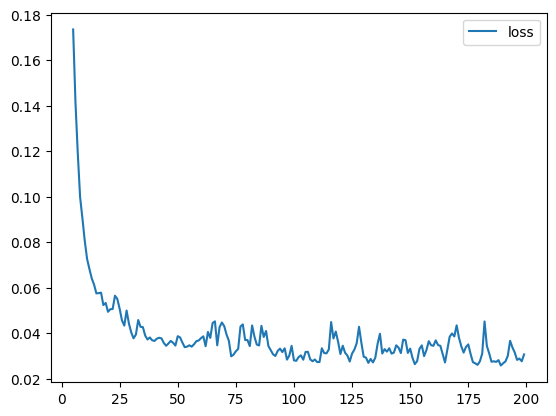

In [7]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();